# Conectores Chave 

In [43]:
from collections import Counter, defaultdict

In [44]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]


In [45]:
friendships = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

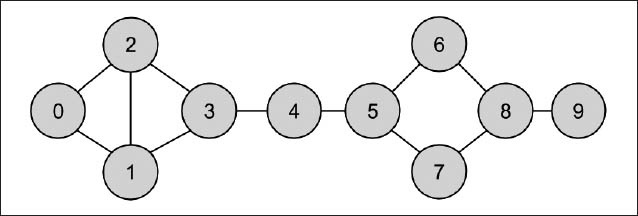

In [46]:
# gerando uma lista vazia de amigos para cada usuario

for user in users:
    user["friends"] = []

In [47]:
# povoando a lista de de amigos de cada usuario
for i, j in friendships:
    users[i]["friends"].append(users[j])  # adicionando j como amigo de i
    users[j]["friends"].append(users[i])  # adicionando i como amigo de j


In [48]:
def number_of_friends(user):
    ''' quantos amigos o usuario tem?'''
    return len(user.get("friends"))

In [49]:
total_conections = sum(number_of_friends(user) for user in users)
num_user = len(users)
avg_connections = total_conections / num_user
print(avg_connections)
# media de conexoes

2.4


In [50]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

In [51]:
print(sorted(num_friends_by_id, key=lambda x: x[1], reverse=True)) 
# ordenando por quantidade de amigos do maoir para o menor

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


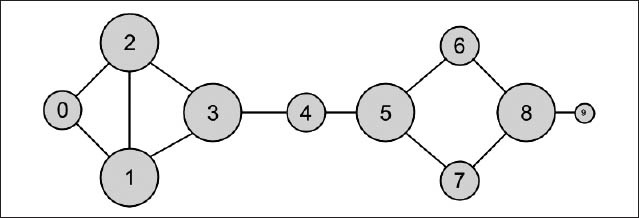

## Cientistas de Dados Que Você Talvez Conheça

In [52]:
def friends_of_friend_ids_bad(user):
    return [
        foaf["id"]
        for friend in user["friends"]
        for foaf in friend["friends"]
        # pega o amigo de cada amigo do usuario
    ]

In [53]:
print(friends_of_friend_ids_bad(users[0]))


[0, 2, 3, 0, 1, 3]


Isso inclui o usuário 0 (duas vezes), uma vez que Hero é, de fato, amigo de
ambos os seus amigos. Inclui os usuários 1 e 2, apesar de eles já serem amigos
do Hero. E inclui o usuário 3 duas vezes, já que Chi é alcançável por meio de
dois amigos diferentes

In [54]:
def not_the_same(user, other_user):  # compara dois usuarios se nao sao a mesma pessoa
    return user["id"] != other_user["id"]

In [55]:
def not_friends(user, other_user):
    return all(not_the_same(friend, other_user) for friend in user["friends"])


In [56]:
def friends_of_friend_ids(user):
    return Counter(
        # foaf seria o amigo do meu amigo que nao é meu amigo
        foaf["id"]
        for friend in user["friends"]
        for foaf in friend["friends"]
        if not_the_same(user, foaf) # que nao seja a eu
        and not_friends(user, foaf) # que nao seja meus amigos
    )

In [57]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [58]:
interests = [
    (0, "Hadoop"),
    (0, "Big Data"),
    (0, "HBase"),
    (0, "Java"),
    (0, "Spark"),
    (0, "Storm"),
    (0, "Cassandra"),
    (1, "NoSQL"),
    (1, "MongoDB"),
    (1, "Cassandra"),
    (1, "HBase"),
    (1, "Postgres"),
    (2, "Python"),
    (2, "scikit-learn"),
    (2, "scipy"),
    (2, "numpy"),
    (2, "statsmodels"),
    (2, "pandas"),
    (3, "R"),
    (3, "Python"),
    (3, "statistics"),
    (3, "regression"),
    (3, "probability"),
    (4, "machine learning"),
    (4, "regression"),
    (4, "decision trees"),
    (4, "libsvm"),
    (5, "Python"),
    (5, "R"),
    (5, "Java"),
    (5, "C++"),
    (5, "Haskell"),
    (5, "programming languages"),
    (6, "statistics"),
    (6, "probability"),
    (6, "mathematics"),
    (6, "theory"),
    (7, "machine learning"),
    (7, "scikit-learn"),
    (7, "Mahout"),
    (7, "neural networks"),
    (8, "neural networks"),
    (8, "deep learning"),
    (8, "Big Data"),
    (8, "artificial intelligence"),
    (9, "Hadoop"),
    (9, "Java"),
    (9, "MapReduce"),
    (9, "Big Data"),
]

In [59]:
def data_scientist_who_like(target_interest):
    return [
        user_id
        for user_id, user_interests in interests
        if user_interests == target_interest
    ]


In [60]:
users_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    users_ids_by_interest[interest].append(user_id)


In [61]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)


In [62]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in users_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

In [64]:
print(most_common_interests_with(users[0]))

Counter({9: 3, 1: 2, 8: 1, 5: 1})


## Salários e Experiência

In [65]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

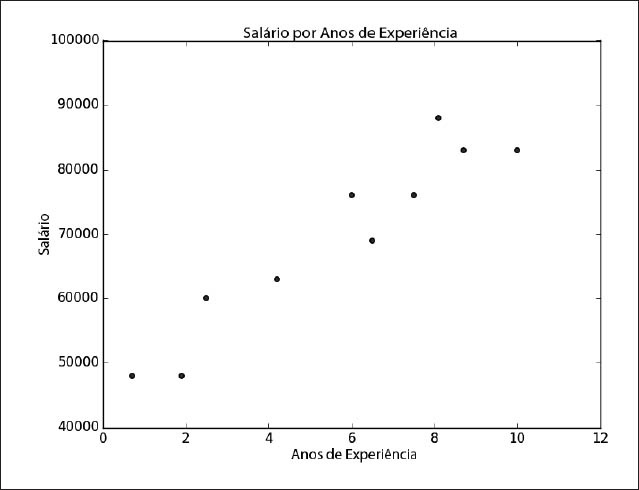

In [66]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [67]:
print(salary_by_tenure)

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})


In [68]:
avarage_salary_by_tenure = {
    tenure: sum(salaries)/len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}


In [69]:
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between two and five'
    else:
        return 'more than five'

In [70]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)


In [71]:
avarage_salary_by_bucket = {
    tenure_bucket: sum(salaries)/ len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [72]:
print(avarage_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


## Contas Pagas

Estimativa de pagamento de contas com base no ano de experiencia do usuario

0.7 paid
1.9 unpaid
2.5 paid
4.2 unpaid
6 unpaid
6.5 unpaid
7.5 unpaid
8.1 unpaid
8.7 paid
10 paid

In [73]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

## Tópicos de Interesse

In [74]:
words_and_counts = Counter(word
    for user, interest in interests
    for word in interest.lower().split()
)

In [75]:
for word, count in words_and_counts.most_common():
    if count >1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
